
Reading data from Downloads/CHGCAR...


Universal Lattice Scaling Factor:
 1.0

Elements:
    Al

Nº Atoms:
    144

Lattice Vectors:
 [[17.121441  0.        0.      ]
 [ 0.       11.414294  0.      ]
 [ 0.        0.       30.088906]]

Atoms Positions ("Direct"):
 [[0.081724 0.155736 0.322731]
 [0.247512 0.123175 0.326493]
 [0.391315 0.131468 0.329855]
 [0.577142 0.119201 0.327042]
 [0.750145 0.128549 0.322613]
 [0.920083 0.115301 0.324509]
 [0.096424 0.396793 0.334461]
 [0.253657 0.37924  0.332306]
 [0.416735 0.367688 0.328712]
 [0.578653 0.334438 0.324707]
 [0.761411 0.377286 0.325815]
 [0.937895 0.379526 0.330039]
 [0.085153 0.623955 0.330069]
 [0.248702 0.619659 0.330985]
 [0.415299 0.627137 0.329892]
 [0.569842 0.626045 0.329522]
 [0.742622 0.636168 0.321095]
 [0.905552 0.599626 0.335282]
 [0.075621 0.872553 0.324063]
 [0.253771 0.856254 0.330847]
 [0.414331 0.877749 0.336261]
 [0.585893 0.880512 0.334189]
 [0.750528 0.883792 0.322675]
 [0.905986 0.866466 0.322371]
 [0.993954 0.0

100%|██████████| 1651508/1651508 [00:59<00:00, 27666.17it/s]



FFT Values:
 [[-9.25375649e-05]
 [ 2.65178585e-05]
 [ 1.36986433e-04]
 ...
 [ 1.30179033e-05]
 [ 1.97771166e-05]
 [ 1.66843158e-05]]


100%|██████████| 336/336 [00:10<00:00, 33.29it/s]



Eletronic Density 3D Matrix:
 [[[-9.25375649e-05 -7.24334845e-05  4.17558917e-05 ... -7.87688320e-05
    3.58130581e-05  1.91208527e-05]
  [-1.51934201e-04 -8.78568989e-05  1.01035375e-04 ... -9.17316934e-05
    9.51022541e-05  3.32059670e-05]
  [-9.55400578e-05 -9.69395351e-05  4.44712393e-05 ... -1.02705230e-04
    3.85621912e-05  4.30960506e-05]
  ...
  [ 1.87802518e-04 -6.33725613e-05 -2.38498181e-04 ... -7.91801422e-05
   -2.44334045e-04  1.50121134e-05]
  [ 1.65670444e-04 -6.49338629e-05 -2.16340673e-04 ... -8.08408088e-05
   -2.22255887e-04  1.65607917e-05]
  [ 4.54549721e-05 -6.45487244e-05 -9.61527061e-05 ... -7.62113992e-05
   -1.02097028e-04  1.39890416e-05]]

 [[ 2.65178585e-05 -6.60992405e-05 -7.52536743e-05 ... -7.66393264e-05
   -8.10724522e-05  1.70611182e-05]
  [-1.21909721e-05 -7.51734748e-05 -3.66996428e-05 ... -8.41219522e-05
   -4.25465898e-05  2.51647224e-05]
  [ 2.59591242e-05 -7.91821445e-05 -7.50295243e-05 ... -8.93423668e-05
   -8.08932983e-05  2.95964634e-05

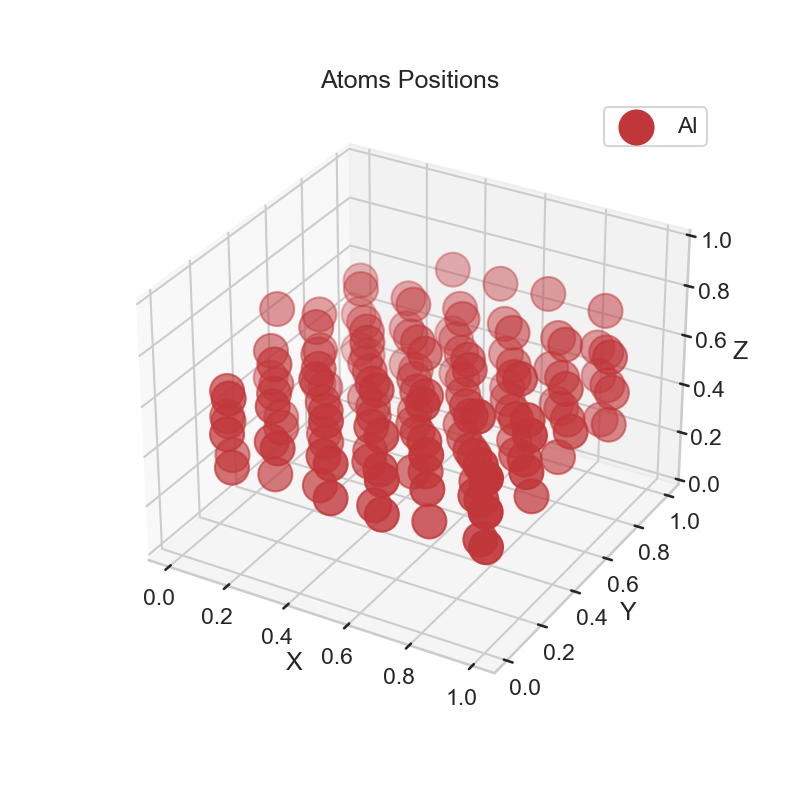

In [1]:
#Author: Marcel Valério de Arruda (marcelva@if.usp.br)

# Alberto: Precisa fazer algumas mudanças para deixar o programa mais geral e robusto
# Alberto: sugestão: criar uma função para ler o arquivo e retornar a matriz

import os
os.getcwd()
os.chdir("/Users/marcelarruda") #Directory definition		# Alberto: Não geral: melhor rodar da pasta onde for chamado
import sys
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from tqdm import tqdm


#OPENING DOCUMENT
chg_file = 'Downloads/CHGCAR' #File path   # Alberto: Não geral: melhor rodar da pasta onde tiver o arquivo
print('\nReading data from '+chg_file+'...\n')
with open(chg_file,'r+') as f:
	lines = f.readlines()
    
	#DEFINING THE SYSTEM
	line = lines[1]
	ULSF = Decimal(lines[1]) #First Line (Universal Lattice Scaling Factor)
	a = float(ULSF) #Change to whatever the cell length is
	print('\nUniversal Lattice Scaling Factor:\n',a)
	A = np.zeros([3,3])
	for i in range(2,5):
		line = lines[i]
		A[:,i-2] = [Decimal(line[4:13]) , Decimal(line[16:25]), Decimal(line[28:37])]		# Alberto: Não robusto: se o vasp mudar minimamente a formatação (ou o compilador), pode não funcionar mais. Melhor usar o strip e split e acessar via fields
	A = a*np.transpose(np.matrix(A)) #lattice vectors
	Elements = lines[5]
	N_Elements = lines[6]
	print("\nElements:\n",Elements)
	print('Nº Atoms:\n',N_Elements)
	print("Lattice Vectors:\n",A)
    
    #Position (Direct) vectors
	P = np.zeros([int(N_Elements),3])
	for i in range(int(N_Elements)):
		line = lines[i+8]
		P[i,:] = [Decimal(line[2:10]), Decimal(line[12:20]), Decimal(line[22:30])]		# Alberto: Não robusto: mesma coisa
	P = (np.matrix(P))
	print('\nAtoms Positions ("Direct"):\n',P)
    
    #This index must be whichever line holds the x,y,z FFT dimensions in the CHG file.
	line = lines[153] #(192, 128, 336)		# Alberto: Não geral: Só funciona para um Chgcar com determinado nr. de elementos, se tiver mais ou menos, não vai funcionar. Precisa achar automaticamente
	xc,yc,zc = [Decimal(line[2:6]) , Decimal(line[7:11]), Decimal(line[12:16])]		# Alberto: Não robusto: ler via campos
	xc,yc,zc = [int(xc),int(yc),int(zc)]		# Alberto: porque não int direto? Mas funciona, ok
	FFT_dims = xc,yc,zc
	print("\nFFT Dimensions:\n",FFT_dims)

	vals = np.zeros([xc*yc*zc,1])
	ct=0
	for i in tqdm(range(153+1,1651662)): #Same as above mentioned index, plus one.		# Alberto: Não geral: Precisa pegar esses índices automaticamente
		line = lines[i]
		for j in range(0,5):
			if ct==xc*yc*zc:
				break
			ln_ind = 18*j + 1
			vals[(ct)] = Decimal(line[ln_ind:ln_ind + 17])  # Alberto: Não robusto: ler campos
			ct+=1
	print("\nFFT Values:\n",vals)            

	chrg = np.zeros([xc,yc,zc])
	ct=0
	for k in tqdm(range(0,zc)):
		for j in range(0,yc):
			for i in range(0,xc):
				chrg[i,j,k] = vals[ct]
				ct+=1
	print("\nEletronic Density 3D Matrix:\n", chrg)
	print("\nCHRG 3D Matrix info's:\n")
	print(np.info(chrg))    
    
	#Position Plot 
	print("\nPosition Plot:\n") 
    
	%matplotlib widget

	df = pd.DataFrame(P)
	sns.set(style = "whitegrid")
	sns.set_palette('RdGy')
	sns.set_context("talk")

	fig = plt.figure(figsize=[8,8])
	ax = fig.add_subplot(111, projection = '3d', title = 'Atoms Positions')

	x = df[0]
	y = df[1]
	z = df[2]

	ax.set_xlabel("X")
	ax.set_ylabel("Y")
	ax.set_zlabel("Z")
	ax.set_zlim(0.0,1.0)
	ax.scatter(x, y, z,s=600,label ='Al')
	ax.legend()

	plt.show()